# How does electric vehicle adoption vary by county?

### Methedology
1. Aggregate the data by County
2. Sort the aggregated data by EV Count to identify which counties have the highest and lowest electric vehicle adoption
3. Create bar plots to visualize the electric vehicle counts by county

In [1]:
# Importing libraries and loading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('../Original_data/Electric_Vehicle_Data.xlsx')

In [2]:
# Check for missing values in County column
print(df['County'].isnull().sum())

3


In [3]:
# Since we only have 3 missing values, we'll drop these rows
df = df.dropna(subset=['County'])

### Group the data by County

In [4]:
county_ev_counts = df.groupby('County').size().reset_index(name='EV Count').sort_values(by='EV Count', ascending=False).reset_index(drop=True).copy()

county_ev_counts

,County,EV Count
0,King,94460
1,Snohomish,21439
2,Pierce,14043
3,Clark,10675
4,Thurston,6600
...,...,...
188,Larimer,1
189,Laramie,1
190,Lane,1
191,Kent,1


### Exploring the data further

In [5]:
# Descriptive statistics for County-level data
county_ev_counts.describe()

,EV Count
count,193.000000
mean,940.181347
std,7094.801732
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,94460.000000


In [7]:
# Top 10 counties with most EVs
top_counties = county_ev_counts.head(10)
top_counties

,County,EV Count
0,King,94460
1,Snohomish,21439
2,Pierce,14043
3,Clark,10675
4,Thurston,6600
5,Kitsap,5956
6,Spokane,4671
7,Whatcom,4331
8,Benton,2183
9,Skagit,1968


### Visualization

C:\Users\abbas\AppData\Local\Temp\ipykernel_19436\572076684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='EV Count', y='County', data=top_counties, palette='coolwarm')


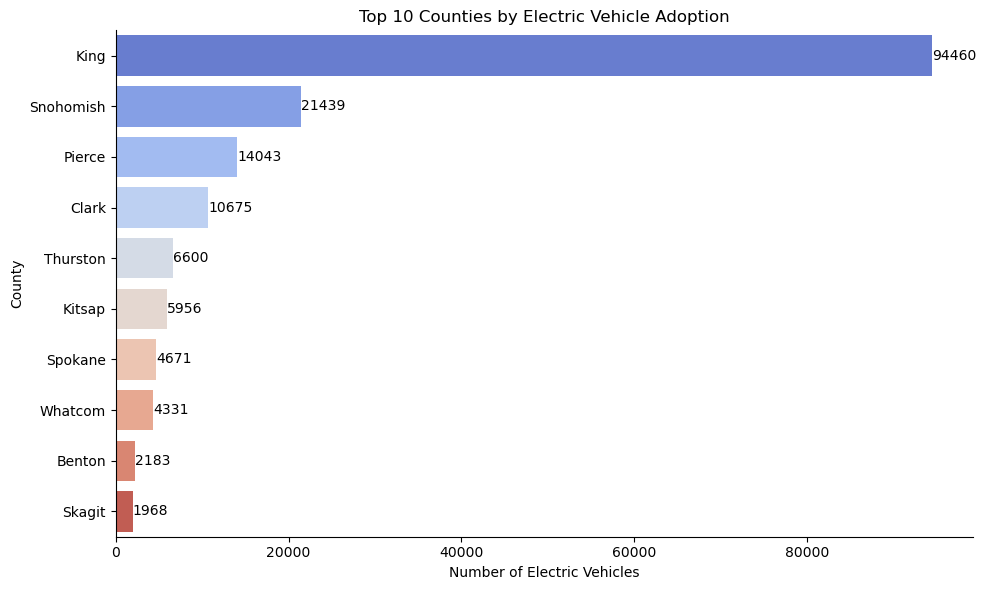

In [13]:

# Bar plot for top counties
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='EV Count', y='County', data=top_counties, palette='coolwarm')
plt.title('Top 10 Counties by Electric Vehicle Adoption')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')

# Add labels to the bars
for i, v in enumerate(top_counties['EV Count']):
    ax.text(v + 3, i, str(v), va='center')

# Remove top and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()